In [ ]:
# import important libraries we will use
import numpy as np
import math
import io
import pandas as pd
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

#updating the xlsx file to here , For your reference and grading, please upload the excel file in the canvas uploaded
# decision_tree = files.upload()
# customer_data=files.upload()
# customer_data_tax=files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#decision = io.BytesIO(decision_tree.get('decision_tree.csv'))
decision = pd.read_csv('/content/drive/MyDrive/EMIA4110/decision_tree.csv')
print(decision)

# customer_data = io.BytesIO(customer_data.get('customer_data.csv'))
customer_data = pd.read_csv('/content/drive/MyDrive/EMIA4110/customer_data.csv')
print(customer_data)


# customer_data_tax = io.BytesIO(customer_data_tax.get('customer_data_with_tax.csv'))
customer_data_tax = pd.read_csv('/content/drive/MyDrive/EMIA4110/customer_data_with_tax.csv')
print(customer_data_tax)


      Age  Income Student Purchase
0     <30    High      No       No
1     <30    High      No      Yes
2   30-40    High      No      Yes
3     >40  Medium      No      Yes
4     >40     Low     Yes      Yes
5   30-40     Low     Yes       No
6     <30  Medium      No       No
7     <30     Low     Yes      Yes
8     >40  Medium     Yes      Yes
9     <30  Medium     Yes      Yes
10  30-40  Medium      No      Yes
11  30-40    High     Yes      Yes
12    >40  Medium      No       No
     Annual Income  Spending Score   Age
0         47058.41           92.59  47.0
1         54841.64           69.56  38.0
2         43940.97           85.69  50.0
3         65282.69           56.37  63.0
4         41084.24           92.67  36.0
..             ...             ...   ...
295       21963.17           82.45  30.0
296       28190.56            7.81  53.0
297       46299.57           90.35  45.0
298       56517.73           68.30  52.0
299       42436.44           91.09  49.0

[300 rows x 3 col

Q1

In [ ]:
decision=np.array(decision)
print(decision)

[['<30' 'High' 'No' 'No']
 ['<30' 'High' 'No' 'Yes']
 ['30-40' 'High' 'No' 'Yes']
 ['>40' 'Medium' 'No' 'Yes']
 ['>40' 'Low' 'Yes' 'Yes']
 ['30-40' 'Low' 'Yes' 'No']
 ['<30' 'Medium' 'No' 'No']
 ['<30' 'Low' 'Yes' 'Yes']
 ['>40' 'Medium' 'Yes' 'Yes']
 ['<30' 'Medium' 'Yes' 'Yes']
 ['30-40' 'Medium' 'No' 'Yes']
 ['30-40' 'High' 'Yes' 'Yes']
 ['>40' 'Medium' 'No' 'No']]


In [ ]:
#function to calculate the entropy
def entropy(data):
  labels = np.unique(data[:, -1])
  entropy = 0
  for label in labels:
    p = len(data[data[:, -1] == label])/len(data)
    entropy -= p * math.log(p, 2)
  return entropy

In [ ]:
#testing
test=np.array([[0,0,'No'],[1,0,'No'],[0,1,'Yes'],[1,1,'Yes']])
# print(test)
print(entropy(test))

1.0


In [ ]:
print("The entropy of this dataset is ",entropy(decision))

The entropy of this dataset is  0.8904916402194913


In [ ]:
# the information gain
def information_gain(data,attribute):
  # print(attribute)
  values=np.unique(data[:,attribute])

  gain=entropy(data)
  for value in values:
    each=data[data[:,attribute]==value]
    gain-=len(each)/len(data)*entropy(each)
  return gain


In [ ]:
# each attribute gain

print("Information gain of Age is ",information_gain(decision,0))
print("Information gain of Income is ",information_gain(decision,1))
print("Information gain of Student is ",information_gain(decision,2))

Information gain of Age is  0.01780102730053701
Information gain of Income is  0.005124332194342274
Information gain of Student is  0.05997383390180783


In [ ]:
# Sample file: print_tree_example.py

sample_tree = {
    'Income': {
        'High': 'No',
        'Low': {
            'Student': {
                'No': 'No',
                'Yes': 'Yes'
            }
        },
        'Medium': 'Yes'
    }
}

# Define the printTree function
def printTree(tree, indent=""):
    for key, value in tree.items():
        print(indent + str(key))
        if isinstance(value, dict):
            printTree(value, indent + "    ")
        else:
            print(indent + "    -> " + str(value))


print("Decision Tree Structure:")
printTree(sample_tree)


Decision Tree Structure:
Income
    High
        -> No
    Low
        Student
            No
                -> No
            Yes
                -> Yes
    Medium
        -> Yes


In [ ]:
def build_tree(data,round,attr,used_):
  if len(np.unique(data[:,-1])) <= 1 or round==0:
    return data[0,-1]
  # attributes=['Age','Income','Student']
  temp=attr

  best_attr = np.argmax([information_gain(data, attributes.index(i))for i in attr])

  tree = {temp[best_attr]:{}}

  values = np.unique(data[:,best_attr])
  for value in values:
    sub_data = data[data[:,best_attr] == value]
    used=temp[best_attr]
    unique, counts = np.unique(used_, return_counts=True)

    if not used in unique:
      used_ = np.append(used_, used)

    tree[used][value] = build_tree(np.delete(sub_data,best_attr,axis=1),round-1,np.setdiff1d(attr, used_),used_)
    # print(tree)


  return tree

In [ ]:
attributes=['Age','Income','Student']
used=[]
# attributes.remove('Student')
# print(attributes.remove('Student'))
# build_tree1(decision,attributes)
# build_tree(decision,3)
printTree(build_tree(decision,3,np.setdiff1d(attributes, used),used))
# best_attr = np.argmax([information_gain(decision, i)for i in range(3)])
# print(attributes[best_attr])
# tree = {attributes[best_attr]:{}}
# values = np.unique(decision[:,best_attr])
# print(values)

Student
    No
        Age
            30-40
                -> Yes
            <30
                Income
                    High
                        -> No
                    Medium
                        -> No
            >40
                Income
                    Medium
                        -> Yes
    Yes
        Age
            30-40
                Income
                    High
                        -> Yes
                    Low
                        -> No
            <30
                -> Yes
            >40
                -> Yes


Q2

1. The solution provided will be the same, since we mainly consider the data points of each class that are closest to the hyperplane, in scenarios B , it has more data points which are far from the decision boundary and cause few effect on the hyperplane

2. As we added a point that are close to the decision boundary, the hyperplane has to shift right upward in order to maximize the distances bwtween the data points to the hyperplane

3. C may have different solution with a , because data points marked as red has 2 more data marked as green ,data set has a more biased distribution than other two.The Gaussian Naive Bayes favors more to the majority class when we are calculating the probability

Q3

In [ ]:
print(customer_data)
customer_data=np.array(customer_data)

     Annual Income  Spending Score   Age
0         47058.41           92.59  47.0
1         54841.64           69.56  38.0
2         43940.97           85.69  50.0
3         65282.69           56.37  63.0
4         41084.24           92.67  36.0
..             ...             ...   ...
295       21963.17           82.45  30.0
296       28190.56            7.81  53.0
297       46299.57           90.35  45.0
298       56517.73           68.30  52.0
299       42436.44           91.09  49.0

[300 rows x 3 columns]


In [ ]:
def kmeans(X, n_clusters):

    results = np.empty((0,3))

    rng = np.random.RandomState(42)
    random_idx = rng.permutation(X.shape[0])[:n_clusters]

    ###########################################
    # TODO: Step 1: Randomly initialize the centroids
    centroids = X[random_idx]
    #print(type(centroids))
    X = np.array(list(X))



    ###########################################

    while True:
        ###########################################
        # TODO: Step 2: Assign each data point to the closest centroid
        # Hint: labels is a numpy array of shape (n_samples,), where n_samples is the number of samples in the input data X.
        #       Each element in labels is an integer that represents the cluster index to which the corresponding sample in X is assigned.
        #       The cluster indices range from 0 to n_clusters - 1.

        distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        ###########################################

        ###########################################
        # TODO: Step 3: Compute new centroids as the mean of the data points in each cluster
        # Hint: new_centroids is a numpy array of shape (n_clusters, n_features), where n_clusters is the number of clusters and n_features
        #       is the number of features in the input data X. Each row in new_centroids represents the coordinates of a centroid in the feature space.
        #       The centroids are computed as the mean of the samples in X that are assigned to each cluster.
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(n_clusters)])
        """print("new centroids has type:",type(new_centroids))
        print(new_centroids)"""
        ###########################################

        ###########################################
        # TODO: Step 4: Check for convergence (i.e., no change in the centroids)
        if np.all(new_centroids==centroids):
            break
        centroids = np.copy(new_centroids)
        """print(type(centroids))
        print(centroids)"""
        ###########################################

    for i in range(len(centroids)):
      # print(centroids[i])
      results=np.vstack((results,centroids[i]))

    return results

In [ ]:
if __name__=="__main__":
  # Load data
  # subset = data_df[['age', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'smoking']].values

  # Run K-Means
  results = kmeans(customer_data, 3)
  print(results)

[[6.15298123e+04 6.01110000e+01 3.95750000e+01]
 [4.32987248e+04 9.17818333e+01 4.06666667e+01]
 [2.71531292e+04 4.44322500e+01 4.02166667e+01]]


Clustering algorithms that use distance-based measures, such as K-means, are sensitive to differences in scale. Since the Annual Income is much larger than other two features, it can disproportionately influence the clustering results. That can dominate the clustering process, leading to biased or distorted clusters.

In [ ]:
#Normalize the data
mean1=customer_data.mean(axis=0)
# print(mean1)
var1=customer_data.std(axis=0)
# print(var1)
stand_customer_data=(customer_data-mean1)/var1
# print(stand_customer_data)

In [ ]:
if __name__=="__main__":
  # Load data
  # subset = data_df[['age', 'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'smoking']].values

  # Run K-Means
  results = kmeans(stand_customer_data, 3)
  print(results)

[[ 1.09972464 -0.00207688 -0.03528236]
 [-0.66485215  0.89932482 -0.02042663]
 [-0.86974498 -1.79449589  0.11141797]]


In [ ]:
def inertia(X,num):
  centroids=kmeans(X,num)
  distance= np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
  labels = np.argmin(distance, axis=-1)

  sum=0

  for i in range(num):
    sum+=np.sum((X[labels==i]-centroids[i])**2)


  return sum


In [ ]:
#  print(inertia(stand_customer_data,1))
temps=np.array([])
for i in range(10):
  inertias=inertia(stand_customer_data,i+1)

  temps=np.append(temps,inertias)


Text(0.5, 1.0, 'Optimal number of clusters')

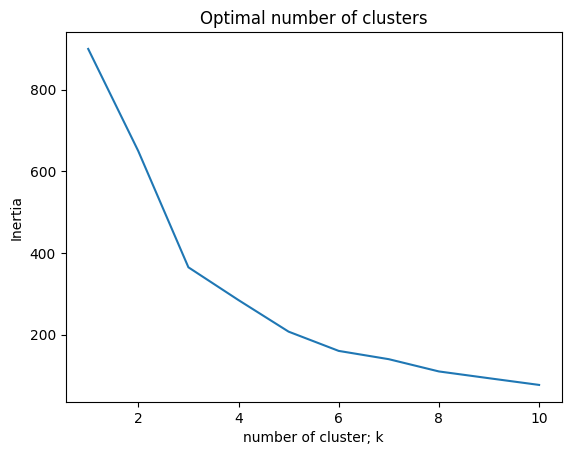

In [ ]:
#plot
import matplotlib.pyplot as plt
y=temps
x=np.array([i+1 for i in range(10)])
plt.plot(x,y)
plt.xlabel('number of cluster; k')
plt.ylabel('Inertia')
plt.title('Optimal number of clusters')

From the graph, the number of the clusters should be 3




Q4

In [ ]:
print(customer_data_tax)
X=np.array(customer_data_tax)

     Annual Income  Spending Score   Age  Annual Tax
0         61822.15           92.59  47.0     9546.64
1         79418.97           69.56  38.0    14825.69
2         55238.93           85.69  50.0     8047.79
3         60638.73           56.37  63.0     9191.62
4         58018.85           92.67  36.0     8603.77
..             ...             ...   ...         ...
295       27237.83           82.45  30.0     2723.78
296       32775.76            7.81  53.0     3555.15
297       64113.91           90.35  45.0    10234.17
298       67548.68           68.30  52.0    11264.60
299       53634.96           91.09  49.0     7726.99

[300 rows x 4 columns]


In [ ]:
test=np.array([[0.49,1.46,4.41],[2.15,-0.62,1.9],[1.03,3.92,9.86],[0.45,4.64,10.72],[-0.76,-1.17,-2.09]])

In [ ]:

def pca(data):
  mean=data.mean(axis=0)
  data=data-mean
  # print(data)
  cov_matrix=(data.T@data*1/data.shape[0])
  print(cov_matrix)
  # Calculate the eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort the eigenvalues in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[sorted_indices]
  # print(sorted_eigenvalues)
  sorted_eigenvectors = eigenvectors[:, sorted_indices]
  # print(sorted_eigenvectors)

    # Calculate the cumulative sum of the eigenvalues
  eigenvalue_sum = np.sum(sorted_eigenvalues)
  # print(eigenvalue_sum)
  cumulative_sum = np.cumsum(sorted_eigenvalues) / eigenvalue_sum
  # print(cumulative_sum)

  num_components = np.argmax(cumulative_sum >= 0.95) + 1
  # print(num_components)
  transformation_matrix = sorted_eigenvectors[:, :num_components]
  return num_components, transformation_matrix

In [ ]:
print(pca(X))

[[ 4.75114171e+08  6.30366594e+04 -1.47125081e+04  1.14172396e+08]
 [ 6.30366594e+04  9.10438255e+02 -1.67971167e+01  1.27842276e+04]
 [-1.47125081e+04 -1.67971167e+01  1.81247500e+02 -2.99159561e+03]
 [ 1.14172396e+08  1.27842276e+04 -2.99159561e+03  2.78480606e+07]]
(1, array([[ 9.72276366e-01],
       [ 1.27898991e-04],
       [-2.98547141e-05],
       [ 2.33834666e-01]]))


Q4 part 2



In [51]:
X_stand=(X-(X.mean(axis=0)))/X.std(axis=0)
# print(X_stand)

num_components,tran  )
print(transforation_matrix.shape)
print(X_stand@transforation_matrix)
print(transforation_matrix.T@X_stand.T)

[[ 1.          0.09584489 -0.05013623  0.992578  ]
 [ 0.09584489  1.         -0.04134981  0.08028821]
 [-0.05013623 -0.04134981  1.         -0.04210846]
 [ 0.992578    0.08028821 -0.04210846  1.        ]]
(300, 4)
(4, 3)
[[-0.47689687  0.24394137 -1.13225453]
 [-1.69294314  0.09282633 -0.05370739]
 [-0.02288349 -0.0159613  -1.12370845]
 [-0.16050915 -1.41161802 -0.9942215 ]
 [-0.28629584  0.89872735 -0.6175748 ]
 [ 1.19334899  0.86890967 -0.42655295]
 [ 0.37425482 -1.25219327 -1.23912041]
 [ 1.41963186 -1.70636594  0.77906778]
 [ 1.2267156   1.05767891 -0.30014619]
 [-1.38218197 -0.5300561  -0.43757622]
 [-2.05433122  0.00362664  0.58528856]
 [-0.26556379  0.98454432 -0.37191604]
 [-2.53491286 -0.67599244  0.06842719]
 [ 0.6773854   2.01687688  0.23835385]
 [-0.03262431  1.30899206  0.99257459]
 [-0.02284623  1.06416944 -0.32491055]
 [-1.28486408  0.51809381  0.9825252 ]
 [-2.44888982 -0.71811761  0.01231675]
 [-0.5354553   0.82928563  0.58376575]
 [ 0.61440039  1.87165001  0.28714687]

part 3

Without normalization, features with larger variances can dominate the PCA process(covariance matrix part). This dominance occurs because the variance represents the spread or variability of the data along each feature. Features with larger variances contribute more to the overall variance of the dataset